In [187]:
import numpy as np
import matplotlib.pyplot as plt

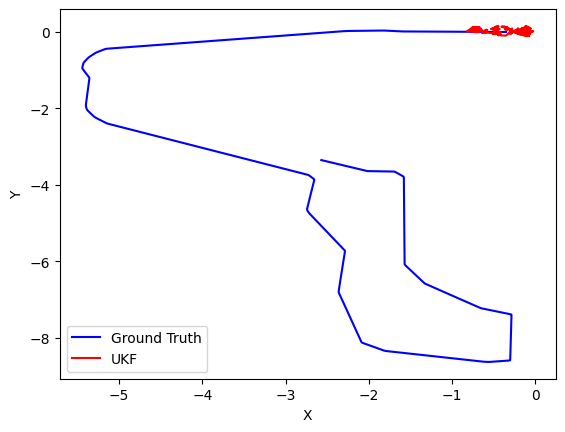

In [188]:
data = np.load("./data/sim/data.npz")
# scan_pose = np.load("./results/turtle_scan_pose.npy")
ekf = np.load("./results/ekf.npy")
ukf = np.load("./results/ukf.npy")
# pf = np.load("./results/pf.npy")
nano = np.load("./results/nano.npy")
ground_truth = data["ground_truth"]
time_gt = data["ground_truth_t"]
odom = data["odom"]
odom_t = data["odom_t"]
odom_ = []
for t in time_gt:
    idx = np.argmin(np.abs(odom_t - t))
    odom_.append(odom[idx])
odom = np.array(odom_)
plt.plot(ground_truth[:, 0], ground_truth[:, 1], label="Ground Truth", color="blue")
# plt.plot(scan_pose[:, 0], scan_pose[:, 1], label="Scan", color="orange")
plt.plot(nano[:, 0], nano[:, 1], label="UKF", color="red")
# plt.plot(odom[:, 0], odom[:, 1], label="Odom", color="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [189]:
ekf = np.linalg.norm(ground_truth[:-1][:, :2] - ekf[:, :2], axis=1)
ukf = np.linalg.norm(ground_truth[:-1][:, :2] - ukf[:, :2], axis=1)
pf = np.linalg.norm(ground_truth[:-1][:, :2] - pf[:, :2], axis=1)
nano = np.linalg.norm(ground_truth[:-1][:, :2] - nano[:, :2], axis=1)
plt.figure()
plt.plot(ekf, label="EKF", color="purple")
plt.plot(ukf, label="UKF", color="blue")
# plt.plot(pf, label="PF", color="green")
plt.plot(nano, label="NANO", color="red")
plt.xlabel("Step")
plt.ylabel("Error(m)")
plt.legend()

ValueError: operands could not be broadcast together with shapes (4700,2) (2783,2) 